#### This code, developed by IIT Ropar students Vrushank Ahire, Nikhil Pakhale, Murru Sai Yaswanth, and Guna Challa, utilizes novel algorithms/data structures/techniques.

In [ ]:
pip install sentence_transformers

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util

# Load the dataset
data = pd.read_csv('/content/Amazon Sales FY2020-21.csv')  # Replace with your dataset path

# Step 1: Standardize Column Names
def standardize_column_names(df):
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(r'[^\w\s]', '', regex=True)
        .str.replace(r'\s+', '_', regex=True)
    )
    return df

data = standardize_column_names(data)

# Display dataset info
print("Standardized Dataset Columns and Data Types:")
print(data.dtypes)

# Step 2: Identify Important Features Using Keyword-based Embeddings
# Initialize the model
model = SentenceTransformer('all-MiniLM-L6-v2')  # A lightweight embedding model

# Define potential keywords related to sales prediction
keywords = [
    "sales", "revenue", "profit", "price", "quantity", "total", "amount",
    "discount", "offers", "holiday", "weekend", "festival", "season", "festive",
    "peak", "new_year", "christmas", "diwali", "dussehra", "eid", "independence_day",
    "republic_day", "holi", "summer", "winter", "monsoon", "marriage_season", "long_weekend",
    "holiday_season", "sale_period", "weekday", "monthly_total", "yearly_sales"
]
keyword_embeddings = model.encode(keywords, convert_to_tensor=True)

# Analyze column relevance
def find_important_columns(columns):
    column_embeddings = model.encode(columns, convert_to_tensor=True)
    important_columns = []

    for i, col in enumerate(columns):
        cosine_scores = util.pytorch_cos_sim(column_embeddings[i], keyword_embeddings).squeeze().tolist()
        if max(cosine_scores) > 0.5:  # Threshold for relevance
            important_columns.append(col)
    return important_columns

important_features = find_important_columns(data.columns)

# Display identified important columns
print("\nImportant Columns for Sales Prediction:")
print(important_features)


In [ ]:
pip install -q pydub

In [ ]:
!pip install -qU langchain langchain-groq python-dotenv unstructured langchain-cohere faiss-gpu

In [ ]:
# Install required packages

import os
from dotenv import load_dotenv
import pandas as pd
from langchain_groq import ChatGroq
from langchain.schema import HumanMessage
from langchain.vectorstores import FAISS
from langchain_cohere import CohereEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from sklearn.preprocessing import StandardScaler

# Load environment variables
# load_dotenv()
# groq_api_key = os.getenv(GROQ_API_KEY)
# cohere_api_key = os.getenv(COHERE_API_KEY)

# Initialize Groq Chat model
chat = ChatGroq(
    temperature=0.7,
    model="llama3-70b-8192",
    api_key=GROQ_API_KEY
)

# Function to standardize column names
def standardize_column_names(df):
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(r'[^\w\s]', '', regex=True)
        .str.replace(r'\s+', '_', regex=True)
    )
    return df

# Load dataset
data = pd.read_csv('/content/Amazon Sales FY2020-21.csv')  # Update with your file path
data = standardize_column_names(data)

# Step 1: Get column names and data types for prompt to ChatGroq
columns_info = [{"name": col, "dtype": str(data[col].dtype)} for col in data.columns]

# Step 2: Generate a prompt for ChatGroq model to identify important columns
prompt = (
    "Given the following dataset columns and their types, please analyze and "
    "identify the main columns that could be relevant for predicting sales. "
    "Consider keywords related to sales, revenue, holidays, and seasonal trends in India.\n\n"
    f"Columns: {columns_info}\n\n"
    "Provide a list of key columns for sales prediction based on this information."
)

# Query the ChatGroq model
response = chat([HumanMessage(content=prompt)])

# Display the response from the ChatGroq model
print("Identified important columns for sales prediction:")
print(response.content)


In [ ]:
import re
import os
from dotenv import load_dotenv
import pandas as pd
from langchain_groq import ChatGroq
from langchain.schema import HumanMessage
from sklearn.preprocessing import MinMaxScaler
import warnings

# Ignore warnings for clarity
warnings.filterwarnings("ignore")

# # Load environment variables
# load_dotenv()
# groq_api_key = os.getenv('GROQ_API_KEY')

# Initialize Groq Chat model
chat = ChatGroq(
    temperature=0.7,
    model="llama3-70b-8192",
    api_key=GROQ_API_KEY
)

# Function to standardize column names
def standardize_column_names(df):
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(r'[^\w\s]', '', regex=True)
        .str.replace(r'\s+', '_', regex=True)
    )
    return df

# Load dataset
data = pd.read_csv('/content/Amazon Sales FY2020-21.csv')  # Update with your file path
data = standardize_column_names(data)

# Step 1: Get column names and data types for prompt to ChatGroq
columns_info = [{"name": col, "dtype": str(data[col].dtype)} for col in data.columns]

# Step 2: Generate a prompt for ChatGroq model to identify important columns
prompt = (
    "Here is a list of columns and their data types in a sales dataset:\n\n"
    f"{columns_info}\n\n"
    "Please respond with a plain, comma-separated list of column names that are essential for predicting sales revenue. "
    "Consider keywords related to sales, revenue, holidays, and seasonal trends in India.\n\n"
    "Do not include any additional explanations or formatting—only provide the column names."
)

# Query the ChatGroq model
response = chat([HumanMessage(content=prompt)])

# Parse response for column names (comma-separated list)
# Remove any whitespace and split by commas
important_columns = [col.strip() for col in response.content.split(",") if col.strip() in data.columns]

print("Identified important columns for sales prediction:")
print(important_columns)

# Step 3: Create a new DataFrame with only important columns
important_data = data[important_columns]

# Step 4: Preprocessing
# 4.1 Handle missing values by filling with median values
important_data = important_data.fillna(important_data.median(numeric_only=True))

# 4.2 Normalize numerical columns (if required)
numerical_cols = important_data.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()  # You can also try StandardScaler() based on your analysis
important_data[numerical_cols] = scaler.fit_transform(important_data[numerical_cols])

# Step 5: Display cleaned and preprocessed DataFrame for analysis
print("\nPreprocessed Data with Important Columns for Sales Prediction:")
print(important_data.head())


Identified important columns for sales prediction:
['order_date', 'item_id', 'qty_ordered', 'price', 'discount_amount', 'total', 'year', 'month', 'category', 'payment_method']

Preprocessed Data with Important Columns for Sales Prediction:
   order_date   item_id  qty_ordered     price  discount_amount     total  \
0  01/10/2020  0.000009        0.040  0.000888              0.0  0.017756   
1  01/10/2020  0.000015        0.020  0.000188              0.0  0.001876   
2  01/10/2020  0.000024        0.016  0.001480              0.0  0.011842   
3  01/10/2020  0.000030        0.016  0.000789              0.0  0.006312   
4  13/11/2020  0.061784        0.002  0.000987              0.0  0.000987   

   year   month       category payment_method  
0   0.0  Oct-20  Men's Fashion            cod  
1   0.0  Oct-20  Men's Fashion            cod  
2   0.0  Oct-20  Men's Fashion            cod  
3   0.0  Oct-20  Men's Fashion            cod  
4   0.0  Nov-20  Men's Fashion            cod  


In [ ]:
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from dotenv import load_dotenv
from langchain_groq import ChatGroq
from langchain.schema import HumanMessage
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import networkx as nx
import shap  # For SHAP values
import warnings

# Ignore warnings for clarity
warnings.filterwarnings("ignore")

chat = ChatGroq(
    temperature=0.7,
    model="llama3-70b-8192",
    api_key=GROQ_API_KEY
)


# Ignore warnings for clarity
warnings.filterwarnings("ignore")

# # Load environment variables
# load_dotenv()
# groq_api_key = os.getenv('GROQ_API_KEY')


# Function to standardize column names
def standardize_column_names(df):
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(r'[^\w\s]', '', regex=True)
        .str.replace(r'\s+', '_', regex=True)
    )
    return df

# Function to create a directed graph based on important columns
# Function to create a directed graph based on important columns
def create_dynamic_graph(important_columns):
    G = nx.DiGraph()

    # Add nodes with initial weight (can be adjusted based on LLM feedback)
    for feature in important_columns:
        G.add_node(feature, weight=1.0)

    # Generate relationships dynamically using LLM
    relationships_prompt = (
        "Given the following important columns in a sales dataset:\n"
        f"{', '.join(important_columns)}\n\n"
        "Please provide potential relationships between these columns as pairs in the following format:\n"
        "[('column1', 'column2'), ('column3', 'column4'), ...]\n"
        "Output only the list without any additional text or explanation."
    )

    # Query the LLM for relationships
    response = chat([HumanMessage(content=relationships_prompt)])

    # Attempt to parse the response
    try:
        # Use ast.literal_eval instead of eval for safer parsing
        import ast
        relationships = ast.literal_eval(response.content.strip())  # Expecting a list of tuples
    except (SyntaxError, ValueError) as e:
        print(f"Error parsing relationships: {e}")
        relationships = []  # Fallback to an empty list if parsing fails

    for start, end in relationships:
        if start in important_columns and end in important_columns:
            G.add_edge(start, end)

    return G

# Load dataset
file_path = '/content/Amazon Sales FY2020-21.csv'  # Update with your file path
data = pd.read_csv(file_path)
data = standardize_column_names(data)

# Step 1: Get column names and data types for prompt to ChatGroq
columns_info = [{"name": col, "dtype": str(data[col].dtype)} for col in data.columns]

# Step 2: Generate a prompt for ChatGroq model to identify important columns
prompt = (
    "Here is a list of columns and their data types in a sales dataset:\n\n"
    f"{columns_info}\n\n"
    "Please respond with a plain, comma-separated list of column names that are essential for predicting sales revenue. "
    "Consider keywords related to sales, revenue, holidays, and seasonal trends in India.\n\n"
    "Do not include any additional explanations or formatting—only provide the column names."
)

# Query the ChatGroq model
response = chat([HumanMessage(content=prompt)])

# Parse response for column names (comma-separated list)
important_columns = [col.strip() for col in response.content.split(",") if col.strip() in data.columns]

print("Identified important columns for sales prediction:")
print(important_columns)

# Step 3: Create a new DataFrame with only important columns
important_data = data[important_columns]

# Step 4: Preprocessing
# 4.1 Handle missing values by filling with median values
important_data = important_data.fillna(important_data.median(numeric_only=True))

# 4.2 Normalize numerical columns (if required)
numerical_cols = important_data.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()  # You can also try StandardScaler() based on your analysis
important_data[numerical_cols] = scaler.fit_transform(important_data[numerical_cols])

# Step 5: Create a directed graph based on important columns dynamically
G = create_dynamic_graph(important_columns)

# Step 6: Calculate closeness centrality as feature vectors
centrality = nx.closeness_centrality(G)

# Prepare data for LSTM predictions
# Step 7: Reshape data for LSTM model
# Assume 'total_sales' is the target variable. Modify based on your dataset.
target_variable = 'total'  # Replace with the actual target variable if different
y = important_data[target_variable].values

# Prepare the feature matrix (using weights and closeness)
data_for_prediction = []
for feature in important_columns:
    weight = G.nodes[feature]["weight"]
    closeness = centrality.get(feature, 0)
    data_for_prediction.append([weight, closeness])

# Convert to DataFrame for analysis
X = np.array(data_for_prediction)  # Feature matrix
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshaping for LSTM

print(X,'\n\n')
print(y)
exit(1)
# Step 8: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Build and train the LSTM model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(tf.keras.layers.LSTM(50, return_sequences=False))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train, y_train, batch_size=1, epochs=10)

# Step 10: Make predictions
predictions = model.predict(X_test)

# Step 11: Evaluate the model
mse = mean_squared_error(y_test, predictions)

# Output results
print("Predictions:", predictions)
print("Mean Squared Error:", mse)

# Step 12: Explain the model predictions using SHAP
# Fit a linear model for SHAP explanations
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_test)

# Step 13: Visualize SHAP values
shap.summary_plot(shap_values, X_test, feature_names=important_columns)

# Step 14: Create high-definition sales graphs
plt.figure(figsize=(12, 8))
plt.plot(y_test, label='Actual Sales', color='blue')
plt.plot(predictions, label='Predicted Sales', color='orange')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Sample Index')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid()
plt.savefig('actual_vs_predicted_sales.png', dpi=300)  # Save as high-res image
plt.show()

# Optional: Show the graph structure
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
labels = nx.get_node_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={ (start, end): start + " -> " + end for start, end in G.edges() })
plt.title("Graph Representation of Features with Weights")
plt.savefig('graph_representation.png', dpi=300)  # Save as high-res image
plt.show()


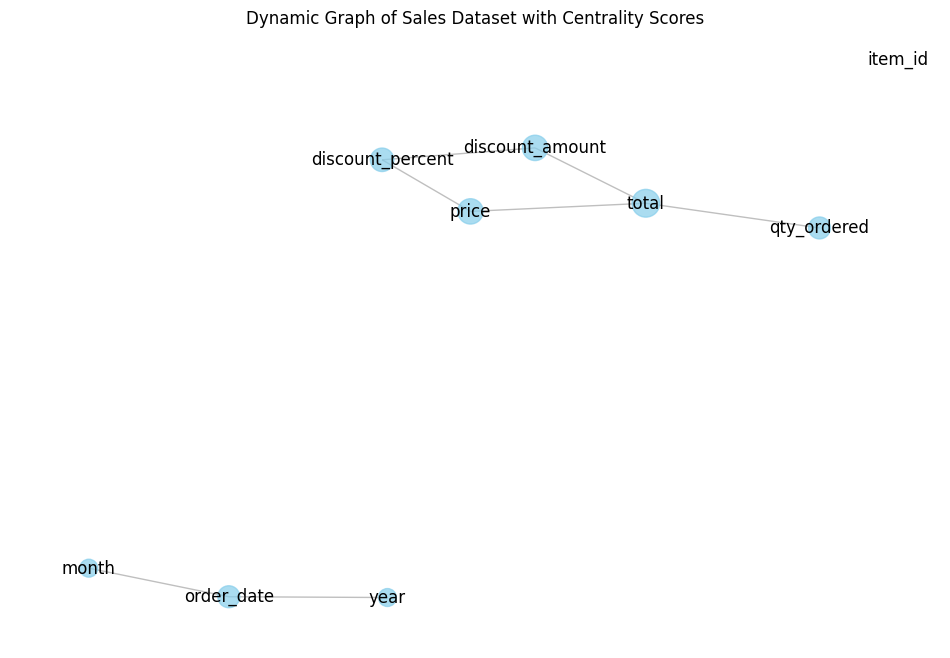

ValueError: could not convert string to float: '22/11/2020'

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from langchain_groq import ChatGroq
from langchain.schema import HumanMessage
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
import warnings
import re  # Import regular expressions for parsing

# Ignore warnings for clarity
warnings.filterwarnings("ignore")

# Initialize your ChatGroq model
chat = ChatGroq(
    temperature=0.7,
    model="llama3-70b-8192",
    api_key=GROQ_API_KEY
)

# Load the dataset dynamically
def load_data(file_path):
    """
    Load a CSV file into a pandas DataFrame.
    Args:
    - file_path (str): Path to the CSV file.

    Returns:
    - pd.DataFrame: Loaded data.
    """
    return pd.read_csv(file_path)

# Standardize column names dynamically
def standardize_column_names(df):
    """
    Standardize column names by stripping, lowering, and replacing unwanted characters.
    Args:
    - df (pd.DataFrame): DataFrame with original column names.

    Returns:
    - pd.DataFrame: DataFrame with standardized column names.
    """
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(r'[^\w\s]', '', regex=True)
        .str.replace(r'\s+', '_', regex=True)
    )
    return df

# Get important columns using LLM dynamically
def get_important_columns(data):
    """
    Query the LLM to get important columns for sales prediction.
    Args:
    - data (pd.DataFrame): DataFrame containing sales data.

    Returns:
    - list: List of important column names.
    """
    columns_info = [{"name": col, "dtype": str(data[col].dtype)} for col in data.columns]

    prompt = (
        "Here is a list of columns and their data types in a sales dataset:\n\n"
        f"{columns_info}\n\n"
        "Please respond with a plain, comma-separated list of column names that are essential for predicting sales revenue. "
        "Consider keywords related to sales, revenue, holidays, and seasonal trends.\n\n"
        "Do not include any additional explanations or formatting—only provide the column names."
    )

    response = chat([HumanMessage(content=prompt)])
    important_columns = [col.strip() for col in response.content.split(",") if col.strip() in data.columns]

    return important_columns

# Get relationships dynamically
def get_dynamic_relationships(columns):
    """
    Query the LLM to get potential relationships between columns.
    Args:
    - columns (list): List of column names.

    Returns:
    - list: List of tuples representing relationships.
    """
    prompt = (
        f"Given the following columns: {', '.join(columns)}, please list potential relationships between them as pairs in this format: (column1, column2). "
        "Ensure the output is plain text with no additional explanations."
    )

    response = chat([HumanMessage(content=prompt)])

    # Parse response to extract pairs
    # Remove any leading or trailing text and split by lines or commas
    raw_relationships = response.content.strip().splitlines()
    relationships = []

    # Regex pattern to match pairs (column1, column2)
    pattern = r'\((\w+),\s*(\w+)\)'

    for line in raw_relationships:
        matches = re.findall(pattern, line)
        relationships.extend(matches)

    return relationships

# Create the graph dynamically
def create_dynamic_graph(columns, relationships):
    """
    Create a directed graph using NetworkX.
    Args:
    - columns (list): List of important column names.
    - relationships (list): List of tuples representing relationships.

    Returns:
    - nx.Graph: The constructed graph.
    """
    G = nx.Graph()

    # Add nodes
    for col in columns:
        G.add_node(col)

    # Add edges based on relationships with default weights
    for start, end in relationships:
        G.add_edge(start, end, weight=1.0)

    return G

# Calculate centrality measures dynamically
def calculate_dynamic_centrality(G):
    """
    Calculate various centrality measures for the graph.
    Args:
    - G (nx.Graph): The graph for which to calculate centrality.

    Returns:
    - pd.DataFrame: DataFrame containing centrality measures.
    """
    closeness = nx.closeness_centrality(G)
    betweenness = nx.betweenness_centrality(G)
    eigenvector = nx.eigenvector_centrality(G)

    centrality_df = pd.DataFrame({
        'Node': G.nodes(),
        'Closeness': closeness.values(),
        'Betweenness': betweenness.values(),
        'Eigenvector': eigenvector.values()
    })

    return centrality_df

# ... (Previous code) ...

# Train a predictive model
def train_predictive_model(data, target_column):
    """
    Train a predictive model using RandomForestRegressor.
    Args:
    - data (pd.DataFrame): DataFrame containing the training data.
    - target_column (str): Name of the target column.

    Returns:
    - model: Trained model.
    - X_test: Test feature set.
    - y_test: Test target set.
    """
    # Convert 'item_id' and 'order_id' to numerical representation
    for col in ['item_id', 'order_id']: #'order_date'
        if col in data.columns:  # Check if the column exists in your data
            # Attempt to convert to numeric, coercing errors to NaN
            data[col] = pd.to_numeric(data[col], errors='coerce')
            # If NaN values were introduced, fill them with 0
            data[col] = data[col].fillna(0)
            # If it contains string try one-hot encoding
            if data[col].dtype == 'object':
                from sklearn.preprocessing import LabelEncoder
                le = LabelEncoder()
                data[col] = le.fit_transform(data[col])


    X = data.drop(columns=[target_column])
    y = data[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    return model, X_test, y_test

# ... (Rest of the code) ...

# Apply SHAP for model interpretation
def explain_model_predictions(model, X):
    """
    Explain model predictions using SHAP.
    Args:
    - model: Trained model.
    - X (pd.DataFrame): Feature set for explanation.

    Returns:
    - shap_values: SHAP values for the feature set.
    - explainer: SHAP explainer object.
    """
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    return shap_values, explainer

# Visualize SHAP values
def visualize_shap_values(shap_values, X):
    """
    Visualize SHAP values with summary plots.
    Args:
    - shap_values: SHAP values for the feature set.
    - X (pd.DataFrame): Feature set for explanation.
    """
    shap.summary_plot(shap_values, X, plot_type="bar", show=True)

# Visualize the graph dynamically
def visualize_graph(G, centrality_scores):
    """
    Visualize the graph with nodes sized according to their centrality scores.
    Args:
    - G (nx.Graph): The graph to visualize.
    - centrality_scores (pd.DataFrame): DataFrame containing centrality scores.
    """
    pos = nx.spring_layout(G)  # Position nodes using the Fruchterman-Reingold force-directed algorithm
    node_sizes = [centrality_scores.loc[centrality_scores['Node'] == node, 'Closeness'].values[0] * 1000 for node in G.nodes()]

    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, alpha=0.7, node_color='skyblue')
    nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, edge_color='gray')

    labels = {node: node for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=12)

    plt.title("Dynamic Graph of Sales Dataset with Centrality Scores")
    plt.axis('off')  # Turn off the axis
    plt.show()

# Main function to execute the process
def main(file_path):
    """
    Execute the full process of loading data, analyzing it, and visualizing results.
    Args:
    - file_path (str): Path to the sales dataset CSV file.
    """
    # Step 1: Load the dataset
    data = load_data(file_path)
    data = standardize_column_names(data)

    # Step 2: Identify important columns dynamically
    important_columns = get_important_columns(data)

    # Step 3: Get relationships dynamically
    relationships = get_dynamic_relationships(important_columns)

    # Step 4: Create the graph
    G = create_dynamic_graph(important_columns, relationships)

    # Step 5: Calculate centrality scores
    centrality_scores = calculate_dynamic_centrality(G)

    # Step 6: Visualize the graph
    visualize_graph(G, centrality_scores)

    # Step 7: Train a predictive model on a target variable (e.g., 'total')
    target_column = 'total'  # Adjust based on your dataset
    model, X_test, y_test = train_predictive_model(data, target_column)

    # Step 8: Explain model predictions using SHAP
    shap_values, explainer = explain_model_predictions(model, X_test)

    # Step 9: Visualize SHAP values
    visualize_shap_values(shap_values, X_test)

# Execute the main function with the path to your dataset
main("/content/Amazon Sales FY2020-21.csv")

In [ ]:
pip install -qU pandas numpy networkx scikit-learn plotly langchain

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from langchain_groq import ChatGroq
from langchain.schema import HumanMessage
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import shap
import warnings
import re
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
class SalesAnalyzer:
    def __init__(self, api_key, model="llama3-70b-8192", temperature=0.7):
        """
        Initialize the SalesAnalyzer with API configurations and default parameters.
        """
        self.chat = ChatGroq(
            temperature=temperature,
            model=model,
            api_key=api_key
        )
        self.data = None
        self.model = None
        self.important_columns = None
        self.relationships = None
        self.graph = None
        self.centrality_scores = None
        self.feature_importance = None
        self.metrics = {}

    def load_and_preprocess_data(self, file_path):
        """
        Load and preprocess the dataset with enhanced error handling and data validation.
        """
        try:
            # Load data
            self.data = pd.read_csv(file_path)

            # Standardize column names
            self.data.columns = (
                self.data.columns.str.strip()
                .str.lower()
                .str.replace(r'[^\w\s]', '', regex=True)
                .str.replace(r'\s+', '_', regex=True)
            )

            # Handle missing values
            numeric_columns = self.data.select_dtypes(include=[np.number]).columns
            categorical_columns = self.data.select_dtypes(include=['object']).columns

            self.data[numeric_columns] = self.data[numeric_columns].fillna(self.data[numeric_columns].mean())
            self.data[categorical_columns] = self.data[categorical_columns].fillna('unknown')

            # # Convert date columns
            # date_columns = self.data.columns[self.data.columns.str.contains('date|time', case=False)]
            # for col in date_columns:
            #     try:
            #         self.data[col] = pd.to_datetime(self.data[col])
            #         self.data[f'{col}_month'] = self.data[col].dt.month
            #         self.data[f'{col}_year'] = self.data[col].dt.year
            #         self.data[f'{col}_day'] = self.data[col].dt.day
            #     except:
            #         print(f"Could not convert {col} to datetime")

            return True
        except Exception as e:
            print(f"Error in data loading and preprocessing: {str(e)}")
            return False

    def get_important_columns(self):
        """
        Enhanced column importance identification using LLM with better prompting.
        """
        try:
            columns_info = [{"name": col, "dtype": str(self.data[col].dtype)} for col in self.data.columns]

            prompt = (
                "Analyze this sales dataset columns and their types:\n\n"
                f"{columns_info}\n\n"
                "Provide a comma-separated list of column names that are most predictive of sales performance, considering:\n"
                "1. Direct sales indicators (revenue, quantity, etc.)\n"
                "2. Time-based features (dates, seasons)\n"
                "3. Customer behavior indicators\n"
                "4. Product attributes\n"
                "Response format: column1,column2,column3"
            )

            response = self.chat([HumanMessage(content=prompt)])
            self.important_columns = [col.strip() for col in response.content.split(",") if col.strip() in self.data.columns]

            return self.important_columns
        except Exception as e:
            print(f"Error in getting important columns: {str(e)}")
            return []

    def analyze_relationships(self):
        """
        Enhanced relationship analysis with correlation and statistical measures.
        """
        try:
            # Prepare the prompt for LLM
            prompt = (
                f"Given these columns: {', '.join(self.important_columns)},\n"
                "I need you to identify logical pairs of related columns and categorize them as follows:\n"
                "1. **Temporal Relationships**: Pairs where one column is derived from another date-related column.\n"
                "2. **Causal Relationships**: Pairs where one column directly affects the other.\n"
                "3. **Business Logic**: Pairs that are related through business rules or identifiers.\n\n"
                "Please format your answer exactly as follows without any additional text:\n"
                "LLM Response: Here are the logical pairs of related columns:\n\n"
                "**Temporal Relationships**\n\n"
                "1. (column1, column2) - explanation of the relationship.\n"
                "2. (column1, column2) - explanation of the relationship.\n\n"
                "**Causal Relationships**\n\n"
                "1. (column1, column2) - explanation of the relationship.\n"
                "2. (column1, column2) - explanation of the relationship.\n\n"
                "**Business Logic**\n\n"
                "1. (column1, column2) - explanation of the relationship.\n"
                "2. (column1, column2) - explanation of the relationship.\n\n"
                "Make sure to provide the pairs in the form (column1, column2) as tuples, with the explanations following each pair."
            )

            # Get LLM suggestions for relationships
            response = self.chat([HumanMessage(content=prompt)])

            # Regex pattern to match column pairs
            pattern = r'\(\s*([^,\s]+)\s*,\s*([^,\s]+)\s*\)'
            suggested_relationships = re.findall(pattern, response.content)

            # Calculate correlation matrix for numeric columns
            numeric_columns = self.data[self.important_columns].select_dtypes(include=[np.number]).columns
            correlation_matrix = self.data[numeric_columns].corr() if not numeric_columns.empty else pd.DataFrame()

            # Combine LLM suggestions with statistical correlations
            self.relationships = set()

            # Add highly correlated pairs
            for i in range(len(numeric_columns)):
                for j in range(i + 1, len(numeric_columns)):
                    if abs(correlation_matrix.iloc[i, j]) > 0.5:
                        self.relationships.add((numeric_columns[i], numeric_columns[j]))

            # Add LLM suggested relationships
            for rel in suggested_relationships:
                if len(rel) == 2 and all(col in self.important_columns for col in rel):
                    self.relationships.add(rel)

            # print("Identified Relationships:", self.relationships)
            return list(self.relationships)

        except Exception as e:
            print(f"Error in analyzing relationships: {str(e)}")
            return []


    def build_graph(self):
        """
        Create an enhanced graph with weighted edges based on correlation strength.
        """
        try:
            self.graph = nx.Graph()

            # Add nodes
            for col in self.important_columns:
                self.graph.add_node(col)

            # Add edges with weights
            numeric_columns = self.data[self.important_columns].select_dtypes(include=[np.number]).columns
            correlation_matrix = self.data[numeric_columns].corr()

            for start, end in self.relationships:
                weight = 1.0
                if start in numeric_columns and end in numeric_columns:
                    weight = abs(correlation_matrix.loc[start, end])
                self.graph.add_edge(start, end, weight=weight)

            return self.graph
        except Exception as e:
            print(f"Error in building graph: {str(e)}")
            return None




    def build_graph(self):
        """
        Create an enhanced graph with weighted edges based on correlation strength.
        """
        try:
            self.graph = nx.Graph()

            # Add nodes
            for col in self.important_columns:
                self.graph.add_node(col)

            # Get only numeric columns for correlation calculation
            numeric_columns = [col for col in self.important_columns
                            if col in self.data.select_dtypes(include=[np.number]).columns]

            # Calculate correlation matrix only for numeric columns
            correlation_matrix = self.data[numeric_columns].corr()

            # Add edges with weights
            for start, end in self.relationships:
                weight = 1.0
                # Only use correlation weight if both columns are numeric
                if start in numeric_columns and end in numeric_columns:
                    weight = abs(correlation_matrix.loc[start, end])
                self.graph.add_edge(start, end, weight=weight)

            return self.graph

        except Exception as e:
            print(f"Error in building graph: {str(e)}")
            return None


    # def calculate_metrics(self):
    #     """
    #     Calculate enhanced network metrics and centrality measures.
    #     """
    #     try:
    #         metrics = {
    #             'closeness': nx.closeness_centrality(self.graph),
    #             'betweenness': nx.betweenness_centrality(self.graph),
    #             'eigenvector': nx.eigenvector_centrality(self.graph),
    #             'degree': dict(self.graph.degree()),
    #             'clustering': nx.clustering(self.graph)
    #         }

    #         self.centrality_scores = pd.DataFrame({
    #             'Node': self.graph.nodes(),
    #             'Closeness': [metrics['closeness'][n] for n in self.graph.nodes()],
    #             'Betweenness': [metrics['betweenness'][n] for n in self.graph.nodes()],
    #             'Eigenvector': [metrics['eigenvector'][n] for n in self.graph.nodes()],
    #             'Degree': [metrics['degree'][n] for n in self.graph.nodes()],
    #             'Clustering': [metrics['clustering'][n] for n in self.graph.nodes()]
    #         })

    #         return self.centrality_scores
    #     except Exception as e:
    #         print(f"Error in calculating metrics: {str(e)}")
    #         return None

    def calculate_metrics(self):
        """
        Calculate enhanced network metrics and centrality measures.
        """
        try:
            # First check if graph exists and has nodes
            if self.graph is None or len(self.graph.nodes()) == 0:
                print("Error: Graph is empty or not initialized")
                return None

            # Calculate metrics with error handling for each centrality measure
            metrics = {}

            try:
                metrics['closeness'] = nx.closeness_centrality(self.graph)
            except:
                metrics['closeness'] = {node: 0.0 for node in self.graph.nodes()}

            try:
                metrics['betweenness'] = nx.betweenness_centrality(self.graph)
            except:
                metrics['betweenness'] = {node: 0.0 for node in self.graph.nodes()}

            try:
                metrics['eigenvector'] = nx.eigenvector_centrality(self.graph, max_iter=1000)
            except:
                metrics['eigenvector'] = {node: 0.0 for node in self.graph.nodes()}

            try:
                metrics['degree'] = dict(self.graph.degree())
            except:
                metrics['degree'] = {node: 0.0 for node in self.graph.nodes()}

            try:
                metrics['clustering'] = nx.clustering(self.graph)
            except:
                metrics['clustering'] = {node: 0.0 for node in self.graph.nodes()}

            # Create DataFrame with explicit node list
            nodes_list = list(self.graph.nodes())
            self.centrality_scores = pd.DataFrame({
                'Node': nodes_list,
                'Closeness': [metrics['closeness'][n] for n in nodes_list],
                'Betweenness': [metrics['betweenness'][n] for n in nodes_list],
                'Eigenvector': [metrics['eigenvector'][n] for n in nodes_list],
                'Degree': [metrics['degree'][n] for n in nodes_list],
                'Clustering': [metrics['clustering'][n] for n in nodes_list]
            })

            # print("Centrality Scores:")
            # print(self.centrality_scores.head())
            return self.centrality_scores
        except Exception as e:
            print(f"Error in calculating metrics: {str(e)}")
            return None
    # def train_model(self, target_column, test_size=0.2):
    #     """
    #     Enhanced model training with feature engineering and validation.
    #     """
    #     try:
    #         # Prepare features
    #         X = self.data[self.important_columns].copy()
    #         if target_column in X.columns:
    #             X = X.drop(columns=[target_column])

    #         # Handle categorical variables
    #         categorical_columns = X.select_dtypes(include=['object']).columns
    #         label_encoders = {}

    #         for col in categorical_columns:
    #             label_encoders[col] = LabelEncoder()
    #             X[col] = label_encoders[col].fit_transform(X[col])

    #         # Scale numeric features
    #         scaler = StandardScaler()
    #         X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    #         # Prepare target
    #         y = self.data[target_column]

    #         # Split data
    #         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)


    #         print("X_train shape:", X_train.shape)
    #         print("y_train shape:", y_train.shape)
    #         print("X_test shape:", X_test.shape)
    #         print("y_test shape:", y_test.shape)


    #         # Train model
    #         self.model = RandomForestRegressor(
    #             n_estimators=200,
    #             max_depth=None,
    #             min_samples_split=2,
    #             min_samples_leaf=1,
    #             random_state=42
    #         )

    #         self.model.fit(X_train, y_train)

    #         # Calculate metrics
    #         y_pred = self.model.predict(X_test)
    #         self.metrics = {
    #             'r2': r2_score(y_test, y_pred),
    #             'mse': mean_squared_error(y_test, y_pred),
    #             'mae': mean_absolute_error(y_test, y_pred),
    #             'cv_scores': cross_val_score(self.model, X, y, cv=5)
    #         }

    #         # Calculate feature importance
    #         self.feature_importance = pd.DataFrame({
    #             'feature': X.columns,
    #             'importance': self.model.feature_importances_
    #         }).sort_values('importance', ascending=False)

    #         return {
    #             'model': self.model,
    #             'metrics': self.metrics,
    #             'feature_importance': self.feature_importance,
    #             'X_test': X_test,
    #             'y_test': y_test,
    #             'label_encoders': label_encoders,
    #             'scaler': scaler
    #         }
    #     except Exception as e:
    #         print(f"Error in training model: {str(e)}")
    #         return None

    def train_model(self, target_column, test_size=0.2):
        """
        Enhanced model training with feature engineering and validation.
        """
        try:
            # Prepare features and target
            X = self.data[self.important_columns].copy()
            if target_column in X.columns:
                X = X.drop(columns=[target_column])
            y = self.data[target_column]

            # Take only the first 100 data points
            X = X.head(10000)
            y = y.head(10000)

            # Handle categorical variables
            categorical_columns = X.select_dtypes(include=['object']).columns
            label_encoders = {}
            for col in categorical_columns:
                label_encoders[col] = LabelEncoder()
                X[col] = label_encoders[col].fit_transform(X[col])

            # Scale numeric features
            scaler = StandardScaler()
            X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

            # Split data
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

            # print("X_train shape:", X_train.shape)
            # print("y_train shape:", y_train.shape)
            # print("X_test shape:", X_test.shape)
            # print("y_test shape:", y_test.shape)

            # Train model
            self.model = RandomForestRegressor(
                n_estimators=200,
                max_depth=None,
                min_samples_split=2,
                min_samples_leaf=1,
                random_state=42
            )

            self.model.fit(X_train, y_train)

            # Calculate metrics
            y_pred = self.model.predict(X_test)
            self.metrics = {
                'r2': r2_score(y_test, y_pred),
                'mse': mean_squared_error(y_test, y_pred),
                'mae': mean_absolute_error(y_test, y_pred),
                'cv_scores': cross_val_score(self.model, X, y, cv=5)
            }

            # Print metrics
            # print("Metrics:")
            # print("R2 Score:", self.metrics['r2'])
            # print("Mean Squared Error:", self.metrics['mse'])
            # print("Mean Absolute Error:", self.metrics['mae'])
            # print("Cross-Validation Scores:", self.metrics['cv_scores'])

            # Calculate feature importance
            self.feature_importance = pd.DataFrame({
                'feature': X.columns,
                'importance': self.model.feature_importances_
            }).sort_values('importance', ascending=False)

            return {
                'model': self.model,
                'metrics': self.metrics,
                'feature_importance': self.feature_importance,
                'X_test': X_test,
                'y_test': y_test,
                'label_encoders': label_encoders,
                'scaler': scaler
            }
        except Exception as e:
            print(f"Error in training model: {str(e)}")
            return None


    # def create_dashboard(self):
    #     """
    #     Create an interactive dashboard using Plotly.
    #     """
    #     try:
    #         # Create subplot figure
    #         fig = make_subplots(
    #             rows=3, cols=2,
    #             subplot_titles=(
    #                 'Feature Importance',
    #                 'Network Graph',
    #                 'Prediction vs Actual',
    #                 'Centrality Measures',
    #                 'Model Performance Metrics',
    #                 'Sales Trends'
    #             )
    #         )

    #         # 1. Feature Importance Plot
    #         fig.add_trace(
    #             go.Bar(
    #                 x=self.feature_importance['importance'],
    #                 y=self.feature_importance['feature'],
    #                 orientation='h',
    #                 name='Feature Importance'
    #             ),
    #             row=1, col=1
    #         )

    #         # 2. Network Graph
    #         pos = nx.spring_layout(self.graph)
    #         edge_trace = go.Scatter(
    #             x=[], y=[],
    #             line=dict(width=0.5, color='#888'),
    #             hoverinfo='none',
    #             mode='lines'
    #         )

    #         for edge in self.graph.edges():
    #             x0, y0 = pos[edge[0]]
    #             x1, y1 = pos[edge[1]]
    #             edge_trace['x'] += (x0, x1, None)
    #             edge_trace['y'] += (y0, y1, None)

    #         node_trace = go.Scatter(
    #             x=[], y=[],
    #             text=[],
    #             mode='markers+text',
    #             hoverinfo='text',
    #             marker=dict(
    #                 size=10,
    #                 color=[],
    #                 colorscale='Viridis',
    #                 line_width=2
    #             )
    #         )

    #         for node in self.graph.nodes():
    #             x, y = pos[node]
    #             node_trace['x'] += (x,)
    #             node_trace['y'] += (y,)
    #             node_trace['text'] += (node,)

    #         fig.add_trace(edge_trace, row=1, col=2)
    #         fig.add_trace(node_trace, row=1, col=2)

    #         # 3. Prediction vs Actual Plot
    #         y_pred = self.model.predict(self.metrics['X_test'])
    #         fig.add_trace(
    #             go.Scatter(
    #                 x=self.metrics['y_test'],
    #                 y=y_pred,
    #                 mode='markers',
    #                 name='Predictions'
    #             ),
    #             row=2, col=1
    #         )

    #         # 4. Centrality Measures
    #         for measure in ['Closeness', 'Betweenness', 'Eigenvector']:
    #             fig.add_trace(
    #                 go.Box(
    #                     y=self.centrality_scores[measure],
    #                     name=measure
    #                 ),
    #                 row=2, col=2
    #             )

    #         # 5. Model Performance Metrics
    #         fig.add_trace(
    #             go.Bar(
    #                 x=['R2', 'MSE', 'MAE'],
    #                 y=[self.metrics['r2'], self.metrics['mse'], self.metrics['mae']],
    #                 name='Model Metrics'
    #             ),
    #             row=3, col=1
    #         )

    #         # 6. Sales Trends (assuming we have date column)
    #         if 'date' in self.data.columns:
    #             daily_sales = self.data.groupby('date')['total'].sum().reset_index()
    #             fig.add_trace(
    #                 go.Scatter(
    #                     x=daily_sales['date'],
    #                     y=daily_sales['total'],
    #                     name='Daily Sales'
    #                 ),
    #                 row=3, col=2
    #             )

    #         # Update layout
    #         fig.update_layout(
    #             height=1200,
    #             width=1600,
    #             showlegend=False,
    #             title_text="Sales Analysis Dashboard"
    #         )

    #         return fig

    #     except Exception as e:
    #         print(f"Error in creating dashboard: {str(e)}")
    #         return None

    def create_dashboard(self):
        """
        Create an interactive dashboard using Plotly with improved error handling and visualization.
        """
        try:
            # Validate required data
            if any(x is None for x in [self.feature_importance, self.graph, self.model,
                                     self.metrics, self.centrality_scores]):
                raise ValueError("Required data missing. Please run analysis steps first.")

            # Create subplot figure with adjusted layout
            fig = make_subplots(
                rows=3, cols=2,
                subplot_titles=(
                    'Feature Importance',
                    'Network Graph',
                    '.',
                    'Centrality Measures',
                    'Model Performance Metrics',
                    '.'
                ),
                vertical_spacing=0.12,
                horizontal_spacing=0.1
            )

            # 1. Feature Importance Plot
            top_features = self.feature_importance.head(10)  # Show top 10 features
            fig.add_trace(
                go.Bar(
                    x=top_features['importance'],
                    y=top_features['feature'],
                    orientation='h',
                    marker_color='rgb(55, 83, 109)'
                ),
                row=1, col=1
            )

            # 2. Network Graph
            pos = nx.spring_layout(self.graph, k=1, iterations=50)

            # Add edges
            edge_x = []
            edge_y = []
            for edge in self.graph.edges():
                x0, y0 = pos[edge[0]]
                x1, y1 = pos[edge[1]]
                edge_x.extend([x0, x1, None])
                edge_y.extend([y0, y1, None])

            fig.add_trace(
                go.Scatter(
                    x=edge_x, y=edge_y,
                    line=dict(width=0.5, color='#888'),
                    hoverinfo='none',
                    mode='lines'
                ),
                row=1, col=2
            )

            # Add nodes
            node_x = []
            node_y = []
            node_text = []
            for node in self.graph.nodes():
                x, y = pos[node]
                node_x.append(x)
                node_y.append(y)
                node_text.append(str(node))

            fig.add_trace(
                go.Scatter(
                    x=node_x, y=node_y,
                    mode='markers+text',
                    hoverinfo='text',
                    text=node_text,
                    textposition='top center',
                    marker=dict(
                        size=10,
                        color='rgb(255, 0, 0)',
                        line_width=2
                    )
                ),
                row=1, col=2
            )



            # 4. Centrality Measures
            for measure in ['Closeness', 'Betweenness', 'Eigenvector']:
                fig.add_trace(
                    go.Box(
                        y=self.centrality_scores[measure],
                        name=measure,
                        marker_color='rgb(55, 83, 109)'
                    ),
                    row=2, col=2
                )

            # 5. Model Performance Metrics
            metric_names = ['R²', 'MSE', 'MAE']
            metric_values = [self.metrics['r2'], self.metrics['mse'], self.metrics['mae']]

            fig.add_trace(
                go.Bar(
                    x=metric_names,
                    y=metric_values,
                    marker_color='rgb(55, 83, 109)'
                ),
                row=3, col=1
            )

            # 6. Sales Trends
            if 'date' in self.data.columns and 'total' in self.data.columns:
                daily_sales = self.data.groupby('date')['total'].sum().reset_index()
                fig.add_trace(
                    go.Scatter(
                        x=daily_sales['date'],
                        y=daily_sales['total'],
                        mode='lines+markers',
                        line=dict(color='rgb(55, 83, 109)'),
                        name='Daily Sales'
                    ),
                    row=3, col=2
                )

            # Update layout with better formatting
            fig.update_layout(
                height=1200,
                width=1600,
                showlegend=False,
                title=dict(
                    text="Sales Analysis Dashboard",
                    x=0.5,
                    y=0.99,
                    font=dict(size=24)
                ),
                paper_bgcolor='white',
                plot_bgcolor='rgba(0,0,0,0)'
            )
                        # 3. Prediction vs Actual Plot
            if 'X_test' in self.metrics and 'y_test' in self.metrics:
                y_pred = self.model.predict(self.metrics['X_test'])

                # Check if y_pred is not empty and create the plot
                if y_pred is not None and len(y_pred) > 0:
                    fig.add_trace(
                        go.Scatter(
                            x=self.metrics['y_test'],
                            y=y_pred,
                            mode='markers',
                            marker=dict(color='rgb(55, 83, 109)'),
                            name='Predictions'
                        ),
                        row=2, col=1
                    )

                    # Add diagonal line for reference
                    min_val = min(min(y_pred), min(self.metrics['y_test']))
                    max_val = max(max(y_pred), max(self.metrics['y_test']))
                    fig.add_trace(
                        go.Scatter(
                            x=[min_val, max_val],
                            y=[min_val, max_val],
                            mode='lines',
                            line=dict(dash='dash', color='red'),
                            name='Perfect Prediction'
                        ),
                        row=2, col=1
                    )
                else:
                    print("Warning: Empty prediction data, cannot plot Prediction vs. Actual.")
            # Update axes labels and formatting
            fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
            fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')

            return fig

        except Exception as e:
            print(f"Error in creating dashboard: {str(e)}")
            traceback.print_exc()
            return None

In [ ]:
def main(file_path, api_key, target_column='total'):
    """Main function to run the analysis with improved error handling."""
    try:
        analyzer = SalesAnalyzer(api_key=api_key)

        # Sequential execution with validation
        if not analyzer.load_and_preprocess_data(file_path):
            raise Exception("Failed to load and preprocess data")

        if not analyzer.get_important_columns():
            raise Exception("Failed to identify important columns")

        if not analyzer.analyze_relationships():
            raise Exception("Failed to analyze relationships")

        if not analyzer.build_graph():
            raise Exception("Failed to build graph")

        if analyzer.calculate_metrics() is None:
            raise Exception("Failed to calculate metrics")

        model_results = analyzer.train_model(target_column)
        if model_results is None:
            raise Exception("Failed to train model")

        dashboard = analyzer.create_dashboard()
        if dashboard is None:
            raise Exception("Failed to create dashboard")

        return {
            'analyzer': analyzer,
            'model_results': model_results,
            'dashboard': dashboard,
            'metrics': analyzer.metrics,
            'feature_importance': analyzer.feature_importance,
            'network_metrics': analyzer.centrality_scores
        }

    except Exception as e:
        print(f"Error in main execution: {str(e)}")
        traceback.print_exc()
        return None

In [ ]:
# Example usage
if __name__ == "__main__":
    # Configuration
    FILE_PATH = "/content/Amazon Sales FY2020-21.csv"
    API_KEY = "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"
    TARGET_COLUMN = "total"  # or whatever your target column is named

    # Run analysis
    # Example usage
    results = main(
    file_path="/content/Amazon Sales FY2020-21.csv",
    api_key=GROQ_API_KEY,
    target_column="total"
    )

    if results and results['dashboard']:
        results['dashboard'].show()

    if results:
        # Access individual components
        analyzer = results['analyzer']
        model = results['model_results']['model']
        dashboard = results['dashboard']

        # Make predictions for new data
        def make_prediction(new_data):
            """
            Make predictions for new data using the trained model.

            Args:
                new_data (pd.DataFrame): New data to predict on

            Returns:
                np.array: Predictions
            """
            try:
                # Preprocess new data
                processed_data = new_data[analyzer.important_columns].copy()

                # Apply label encoding
                for col, encoder in results['model_results']['label_encoders'].items():
                    if col in processed_data.columns:
                        processed_data[col] = encoder.transform(processed_data[col])

                # Apply scaling
                processed_data = pd.DataFrame(
                    results['model_results']['scaler'].transform(processed_data),
                    columns=processed_data.columns
                )

                # Make predictions
                predictions = model.predict(processed_data)

                return predictions

            except Exception as e:
                print(f"Error in making predictions: {str(e)}")
                return None

        # Function to update dashboard
        def update_dashboard(new_data=None):
            """
            Update dashboard with new data if provided.

            Args:
                new_data (pd.DataFrame, optional): New data to incorporate

            Returns:
                go.Figure: Updated dashboard
            """
            try:
                if new_data is not None:
                    # Update analyzer's data
                    analyzer.data = pd.concat([analyzer.data, new_data], ignore_index=True)

                    # Retrain model with updated data
                    analyzer.train_model(TARGET_COLUMN)

                # Create new dashboard
                return analyzer.create_dashboard()

            except Exception as e:
                print(f"Error in updating dashboard: {str(e)}")
                return None

        # Function to export analysis results
        def export_results(output_path="sales_analysis_results"):
            """
            Export analysis results to files.

            Args:
                output_path (str): Path to save results

            Returns:
                bool: Success status
            """
            try:
                # Create output directory if it doesn't exist
                os.makedirs(output_path, exist_ok=True)

                # Export feature importance
                results['feature_importance'].to_csv(
                    f"{output_path}/feature_importance.csv",
                    index=False
                )

                # Export network metrics
                results['network_metrics'].to_csv(
                    f"{output_path}/network_metrics.csv",
                    index=False
                )

                # Export model metrics
                pd.DataFrame({
                    'Metric': ['R2', 'MSE', 'MAE', 'CV_Mean'],
                    'Value': [
                        results['metrics']['r2'],
                        results['metrics']['mse'],
                        results['metrics']['mae'],
                        results['metrics']['cv_scores'].mean()
                    ]
                }).to_csv(f"{output_path}/model_metrics.csv", index=False)

                # Save dashboard as HTML
                results['dashboard'].write_html(f"{output_path}/dashboard.html")

                print(f"Results exported to {output_path}")
                return True

            except Exception as e:
                print(f"Error in exporting results: {str(e)}")
                return False

        # Make these helper functions available in the results
        results['make_prediction'] = make_prediction
        results['update_dashboard'] = update_dashboard
        results['export_results'] = export_results